In [3]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 570.2 kB/s eta 0:00:0000:0100:01


In [4]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [6]:
df = pd.DataFrame()
df

""


In [7]:
df["X1"] = [1,2,3,4,5,6,6,7,9,9]
df["X2"] = [5,3,6,8,1,9,5,8,9,2]
df["label"] = [1,1,0,1,0,1,0,1,0,0]

In [8]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [9]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

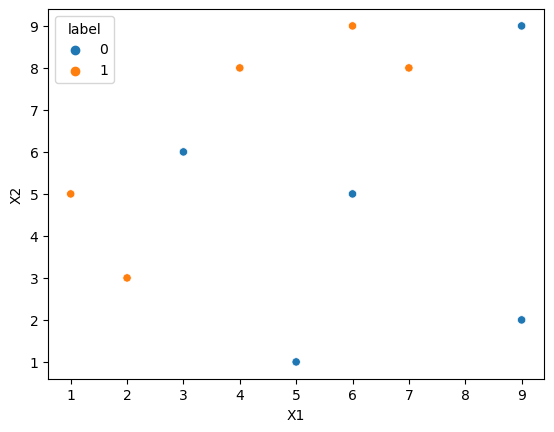

In [12]:
sns.scatterplot(data=df,x='X1',y='X2',hue='label')

In [13]:
df['sample_weight'] = 1/df.shape[0]


In [14]:
df

,X1,X2,label,sample_weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [15]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

In [16]:
dt1

DecisionTreeClassifier(max_depth=1)

In [17]:
X = df.iloc[:,0:2]

In [18]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [19]:
y = df['label']

In [20]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [21]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [22]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

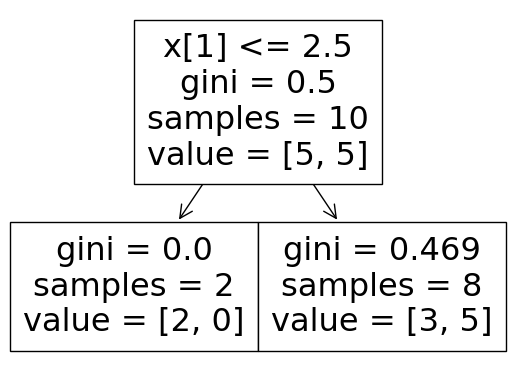

In [23]:
plot_tree(dt1)

In [26]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [27]:
X = np.array(X)

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]])

/Users/deepjyotibhattacharjee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

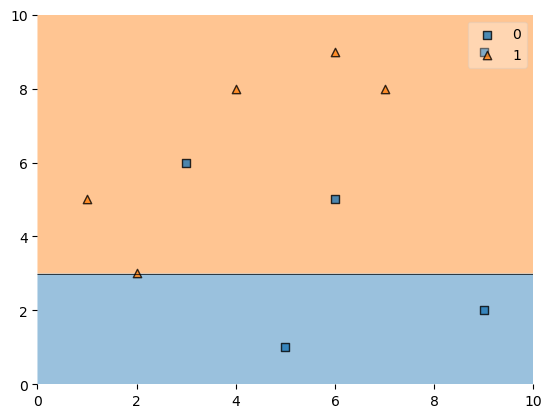

In [28]:
plot_decision_regions(np.array(X),np.array(y),clf=dt1,legend=True)

In [30]:
df['y_pred'] = dt1.predict(X)
df

,X1,X2,label,sample_weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [31]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [32]:
alpha1 = calculate_model_weight(0.3)

In [34]:
alpha1 # performance of stump

0.42364893019360184

In [35]:
# calculate updated weight

In [37]:
def update_row_weight(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['sample_weight']*np.exp(-alpha)
    else:
        return row['sample_weight']*np.exp(alpha)

In [38]:
df['updated_weight'] = df.apply(update_row_weight,axis=1 )

In [39]:
df

,X1,X2,label,sample_weight,y_pred,updated_weight
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [40]:
def normalise_row_weight(row):
    return row['updated_weight']/df['updated_weight'].sum()

In [41]:
df['normalised_weights'] = df.apply(normalise_row_weight,axis=1)

In [42]:
df

,X1,X2,label,sample_weight,y_pred,updated_weight,normalised_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [43]:
df['normalised_weights'].sum()

1.0